# Assignment 1: Transformations


TEAM-ID:   
TEAM-NAME:   
YOUR-ID:   
YOUR-NAME:    

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)

# Instructions
- Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
- Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment. See `./misc/installation` for detailed step-by-step instructions about the installation setup.
- Both the team members must submit the zip file.
- For this assignment, you will be using Open3D extensively. Refer to [Open3D Documentation](http://www.open3d.org/docs/release/): you can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment. Make sure your code is modular since you will be reusing them for future assignments.
- Take a look at the entire assignment. The descriptive questions at the end might have a clue if you are stuck somewhere.
- Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
- Please call the visualization functions only when they are asked. They are asked explicitly at the end of every section.
- You could split the Jupyter Notebook cells where `TODO` is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
import open3d as o3d
import copy
import numpy as np
from scipy.linalg import logm
from scipy.spatial.transform import Rotation as R
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# 1. Getting started with Open3D
## 1.1 Converting RGBD image into Point Cloud


In your robotics journey, it is common to be given just the depth images along with camera parameters in a generic dataset and you'd want to build a 3D data representation out of it, for example, a point cloud. You will understand the math behind these concepts in detail during Vision classes, for now, you can use the in-built functions as a black box.
- Below are the given RGB and D images from SUN RGB-D dataset ([S.Song, CVPR 2015](https://rgbd.cs.princeton.edu/)). 
![low-res-RGBD.resized.png](./misc/low-res-RGBD.png)

- Read these two images `color.jpg` and `depth.png` given in current folder using Open3D. Convert it to a point cloud using the default camera parameters (`o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault`).
Then,
- Create a "world" frame $A$ and combine this (just use $+$ operator) with the above point cloud and save it as `scene.pcd`. Put it aside for now.
- Write a simple function `one_one` to visualize `scene.pcd`.

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


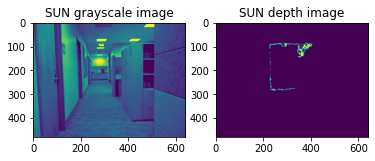

In [2]:
##############################################################################
# TODO: Do tasks described in 1.1                                            #
##############################################################################
# Replace "pass" statement with your code
color_raw = o3d.io.read_image("color.jpg")
depth_raw = o3d.io.read_image("depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('SUN grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SUN depth image')
plt.imshow(rgbd_image.depth)
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [3]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

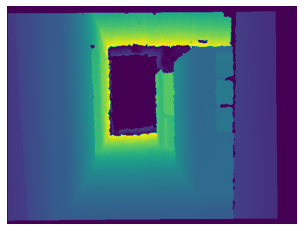

geometry::PointCloud with 3579 points.


In [4]:
def display(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()


colour = o3d.io.read_image("./color.jpg")
depth = o3d.io.read_image("./depth.png")
# display(colour)
display(depth)
rgbdImage = o3d.geometry.RGBDImage.create_from_color_and_depth(colour, depth)
# print(colour.shape)
# display(rgbdImage)
# print(rgbdImage)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbdImage, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
print(pcd)

pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

### Question for 1.1

- In the next code cell, call the function `one_one` here showing `scene.pcd`.

In [5]:
#uncomment the following and add input parameters if any
#one_one()

# 2. Rotations, Euler angles and Gimbal Lock

## 2.1 Rotating an object

The objective here is to roughly simulate an object moving on a ground.

- Generate a cube at some point on the ground and create another frame $B$ at the center of this object. Combine these both as a single point cloud `cube.pcd`. (You can pick a point on the ground by using the `get_picked_points` method of the class `open3d.visualization.VisualizerWithEditing`.)
- Now read both the point clouds `scene.pcd` and `cube.pcd` in a script. Whatever tasks you do below are on the object `cube.pcd` (along with the axes $B$) with `scene.pcd` in the background (static).
- Given a sequence of **ZYX Euler** angles $[30^{\circ}, 90^{\circ}, 45^{\circ}]$, generate the rotation. In our case, our object (with its respective axis) undergoes rotation with the background being fixed (with its respective axis).
- Note: Throughout this assignment, we will be using the standard **ZYX** Euler angle convention.
- Write a function `two_one` to show the above by **animation** (cube rotating along each axis one by one).
    - *Hint: Use Open3D's non-blocking visualization and discretize the rotation to simulate the animation. For example, if you want to rotate by $30^{\circ}$ around a particular axis, do in increments of $5^{\circ}$ 6 times to make it look like an animation.*

In [6]:
##############################################################################
# TODO: Do tasks described in 2.1                                            #
##############################################################################
# Replace "pass" statement with your code
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


### Question for 2.1

- In the next code cell, call the function `two_one` here showing the animation described in section 2.1.

In [7]:
#uncomment the following and add input parameters if any
#two_one()

## 2.2 Euler angle & Gimbal lock

Code the following yourself from scratch (Refer Craig book - Section: $Z-Y-X$ Euler angles - same conventions/notations followed).

- Case 1: Given the rotation matrix $M_{given}$ below, extract Euler angles $\alpha , \beta ,\gamma$. Convert it back to the rotation matrix $M_{recovered}$ from Euler angles.

    $$M(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0.26200263 & -0.19674724 & 0.944799 \\0.21984631 & 0.96542533 & 0.14007684 \\
    -0.93969262 & 0.17101007 & 0.29619813\end{array}\right] $$

    After coding it from scratch, check your calculations using `scipy.spatial.transform.Rotation`. (Mandatory)

- Case 2: Given the rotation matrix $N_{given}$, extract Euler angles, and convert back $N_{recovered}$.

    $$N(\alpha , \beta ,\gamma)=\left[\begin{array}{rrr}0 & -0.173648178 &  0.984807753 \\0 & 0.984807753 & 0.173648178 \\
    -1 & 0 & 0\end{array}\right] $$

    Again use `scipy` and check its output. If `scipy` is showing any warnings on any of the above cases, explain it in "**Questions for 2.2**" (last question). Write code in the next cell.
    
- (Optional) Case 3: Do the above two for quaternion using scipy functions, i.e. given the rotation matrix, extract quaternion and convert back.

In [8]:
##############################################################################
# DON'T EDIT
M_given =  np.array([[0.26200263, -0.19674724, 0.944799],
                     [0.21984631, 0.96542533, 0.14007684],
                     [-0.93969262, 0.17101007, 0.29619813]])

N_given = np.array([[0,-0.173648178,0.984807753],
                    [0, 0.984807753, 0.173648178],
                    [-1, 0, 0]])

In [9]:
# TODO: Do tasks described in 2.2                                            #
##############################################################################
# Replace "pass" statement with your code
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Questions for 2.2
- Have you used `np.arctan` or an any equivalent `atan` function above? Why or why not?   
    * Ans: *your answer here*

### For Case 1 above,
- What Euler angles  $\alpha , \beta ,\gamma$ did you get? Replace `my_array_case1` with your array.

In [10]:
# Uncomment and replace my_array_case1 with your array.
#print("My Euler angles for case 1 are" + str(my_array_case1))

  - Were you able to recover back your rotation matrix when you converted it from Euler angles? Why/why not? Replace `M_given` and `M_recovered` with your matrices below and explain "why/why not" after this code snippet.

In [11]:
# Uncomment and Replace M_given and M_recovered with your matrices below.
#error = np.linalg.norm(logm(M_given @ M_recovered.T))
#print("For case 1, it is " + str(error<0.0001) + " I could recover the original matrix.")

- Why/why not? Based on your observations here, is there any problem with Euler angle representation for Case 1? If yes, what is it?

    - Ans:    *your answer here*

### Repeat the above for Case 2.

In [12]:
# Uncomment and Replace N_given and N_recovered with your matrices below.
# print("My Euler angles for case 2 are" + str(my_array_case2))
# error = np.linalg.norm(logm(N_given @ N_recovered.T))
# print("For case 2, it is " + str(error<0.0001) + " I could recover the original matrix.")

* Why/why not? Based on your observations here, is there any problem with Euler angle representation for Case 2? If yes, what is it?

    * Ans: *your answer here.*
    
    
* Explain any more problems with Euler angle representation. Explain what you understand by Gimbal lock (concisely in your own words). You could revisit this question in the section 2.4.
    * Ans: *your answer here.*

- When you used `scipy.spatial.transform.Rotation` for the above 2 cases,
    - Have you used `zyx` above in `r.as_euler('')` argument? Why or why not? Explain the difference between extrinsic and instrinsic rotations with equivalent technical names from Craig book?
        * Ans: *your answer here.*
    - Has `scipy` shown any warnings on any of the above cases? If yes, explain it.
        * Ans: *your answer here.*
    - (Optional) For Case 3 above (quaternion) which you did using scipy, did you observe any problem with quaternion? Depending on your observations, which is better? Quaternion or Euler angles? And why?
         * Ans: *your answer here.*


## 2.3 Rotation matrix as an Operator
This question will help you in your understanding of [Rotator-transform (Vector-frame) equivalence](https://www.notion.so/saishubodh/Lecture-2-Transformations-11d69d8cef2d4cd195a98fa7d33224e1#f90ece4f5e374743bfed47e46a83ecfe).

![image.png](./misc/xyz-frame.png)
Consider the frame $XYZ$ in the above image. Say you have a vector $x_1=[0,\sqrt{3},0]$. Now you want to rotate it such that you end up at $x_2=[1,1,1]$ through a sequence of Euler angle rotations. Your goal is to find out those $\alpha, \beta \: \& \: \gamma$ ($ZYX$). We will follow this order whenever we refer to it below.

First, properly understand the so-called "Rotator-transform equivalence" to figure out what are the terms of rotation matrix. Then, put the math on paper and you will end up with a set of non-linear equations. Write the set of linear equations in LaTeX here:

$$ \textbf{Ans: Your set of equations here} $$

Solve these equations using `fsolve` from `scipy.optimize` as follows: (Come back and answer the following questions after coding it in the next block)
- `case1`: First, solve it with an initialization of (0,0,0). Check if your answer is correct using `np.isclose`.
    * What Euler angles did you get? Answer in $\alpha, \beta \: \& \: \gamma$ format:
        * Ans: *$a_1, b_1, c_1$ = your answer here.* 
- `case2`: Now, forget about the solver for a moment: Can you visualize and think of sequence of rotations one by one to reach the final position (which is different than previous set of rotations)? Now, validate your answer by giving (your answer $\pm 5$) as initialization.
    * What Euler angles did you get? Answer in $\alpha, \beta \: \& \: \gamma$ format:
        * Ans: *$a_2, b_2, c_2$ = your answer here.*

In [13]:
##############################################################################
# DON'T EDIT
x_1 = np.array([0,np.sqrt(3),0])
x_2 = np.array([1,1,1])

In [14]:
##############################################################################
# TODO: Do tasks described in 2.3                                            #
##############################################################################
# Replace "pass" statement with your code
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [15]:
# From Section 2.2, use the function which takes Euler angles and gives Rotation matrix as output.
# Uncomment and replace `r_mat` with the name of the function. (Do NOT edit anything else)

#x_2_obtained_case1 = r_mat(a1,b1,c1) @ x_1.T #TODO: replace r_mat
#x_2_obtained_case2 = r_mat(a2,b2,c2) @ x_2.T #TODO: replace r_mat
test = False #TODO: Set this as True

In [16]:
# DON'T EDIT
if test == True:
    case1_test = np.isclose(x_2_obtained_case1,  np.array([1.0,1.0,1.0]))
    case2_test = np.isclose(x_2_obtained_case2,  np.array([1.0,1.0,1.0]))
    print("For case 1, it is " + str(bool(case1_test[0] and case1_test[1] and case1_test[2])) + 
          " that I could end up at (1,1,1) after rotation.")
    print("For case 2, it is " + str(bool(case2_test[0] and case2_test[1] and case2_test[2])) + 
          " that I could end up at (1,1,1) after rotation.")

## 2.4 Gimbal Lock visualization (Optional)

A nice visualization video for gimbal lock is [this](https://www.youtube.com/watch?v=zc8b2Jo7mno). You are about to animate a similar visualization demonstrating gimbal lock 😃.

![image.png](./misc/xyz-frame.png)

- Write a function `two_four` for the visualization of gimbal lock. Follow the below steps to get the intuition going. Use Open3D for the following.
    - Say our frame's initial position is as the above image. Now the final goal at the end of rotation is to get the $Y$ axis pointing in the direction of the vector $(x,y,z)$ that you currently see in the above image. This point is fixed in space and is NOT moving as we rotate our axis.
    - For creating that point, you could use a small sphere using `open3d.geometry.create_mesh_sphere`. You already know how to create an axis by now.
    - Following our $ZYX$ convention, first rotate your frame about $Z$ axis by an angle, say $-35^{\circ}$. Then rotate about $Y$ axis by an angle ${\beta}$ and then about $X$ by say $55^{\circ}$.
        - Are there any specific angle(s) $\beta$ using which you will **never** reach our point $(x,y,z)$ ?
            - Clue: We are specifically talking about gimbal lock here and notice the word "never".
        - Under this (these) specific angle(s) of $\beta$ & different combinations of $\alpha$ and $\gamma$, make an animation and clearly show why your $Y$ axis is unable to align in the direction of that vector $(x,y,z)$ using the animation.

            If you are unsure to simulate the animation, you could do it as follows:

            - You could first fix some $\alpha$, say $-35^{\circ}$ & an above value of $\beta$, you can now vary $\gamma$ from $-180^{\circ} \text{ to }180^{\circ}$ to simulate the animation.
            - Now fix another $\alpha$, say $45^{\circ}$ and repeat the above process. So that's 2 specific values of $\alpha$.
            - Show this for all angles of $\beta$ if there are more than 1.
            - Therefore, when the code is run, there should be a minimum of (2 $\times$ (number of values of $\beta$)) animations. 2 for values of $\alpha$, you could show it for even more if you wish to.

In [17]:
##############################################################################
# TODO: Do tasks described in 2.4                                            #
##############################################################################
# Replace "pass" statement with your code
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

> VOILA! You have just animated the famous Gimbal lock problem. If you are curious, read about the [Apollo 11](https://en.wikipedia.org/wiki/Gimbal_lock#On_Apollo_11) Gimbal lock incident.

### Questions for 2.4 (Optional)

- Mention the value(s) of $\beta$ here: 
    * Ans: *your answer here.*
- Now that you understand gimbal lock through visualization, explain it now in matrix form: For the above values of $\beta$, what does the rotation matrix look like? Can you explain why gimbal lock occurs from the rotation matrix alone? Clue: Use sin/cos formulae. 
    * Ans: *your answer here.*
- Call the function `two_four` for the visualization of gimbal lock written above. 

In [18]:
#uncomment the following and add input parameters if any
#two_four()